In [70]:
from cardetail_extract import *
from cardf_create import *
import pandas as pd
import numpy as np
import plotly.express as px

In [71]:
overallframe = create_frames(read_file())

print('Cities Available',overallframe[0])

cardf = overallframe[1]
cardf.head()

Cities Available ['0,bangalore_cars', '1,chennai_cars', '2,delhi_cars', '3,hyderabad_cars', '4,jaipur_cars', '5,kolkata_cars']


,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,place
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,bangalore
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,bangalore


In [72]:
#cardetail
detail_frame = cardetail(cardf.loc[:,['new_car_detail']])
detail_frame['place'] = cardf.place.to_list()
detail_frame.head()

,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,priceActual,priceSaving,priceFixedText,trendingText,place
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,₹ 4.62 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,₹ 7.90 Lakh,,,1,{'imgUrl': 'https://stimg.cardekho.com/used-ca...,bangalore


In [73]:
print("1st row value----->",cardf['new_car_detail'].to_list()[0])

1st row value-----> {'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}


## Detail Frame Cleaning Process

In [74]:
#detail frame cleaning process
#dropping unwanted columns and converting kilo meter column into float

detail_frame.drop(['it','priceActual','priceSaving','priceFixedText','trendingText'],axis = 1,inplace = True)

detail_frame.km = detail_frame.km.apply(lambda x : x.replace(",","")).astype(float)

detail_frame.head(3)

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,bangalore
1,Petrol,SUV,32706.0,Manual,2,2nd Owner,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,bangalore
2,Petrol,Hatchback,11949.0,Manual,1,1st Owner,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,₹ 5.85 Lakh,bangalore


In [75]:
#treating owner column

import re
detail_frame.owner = detail_frame.owner.apply(lambda owner: int(re.findall(r'\d+',owner)[0]))
detail_frame.head(1)

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3,3,Maruti,Maruti Celerio,2015,3979,VXI,₹ 4 Lakh,bangalore


## Unique oem present in the data

In [76]:
print("Unique oem present >>>>>>>>>\n\n",sorted(detail_frame.oem.unique()))
print("\nTotal No of Unique oem >>>>>>",detail_frame.oem.nunique())
print("\nTotal No of Model >>>>>>>",detail_frame.model.nunique())
print("\nUnique modelYear >>>>>>>>\n\n",sorted(detail_frame.modelYear.unique()))

Unique oem present >>>>>>>>>

 ['Audi', 'BMW', 'Chevrolet', 'Citroen', 'Datsun', 'Fiat', 'Ford', 'Hindustan Motors', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Mahindra Renault', 'Mahindra Ssangyong', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']

Total No of Unique oem >>>>>> 33

Total No of Model >>>>>>> 315

Unique modelYear >>>>>>>>

 [1985, 1995, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


# Price Column

In [77]:
#price values are in thousands, lakh, crore. so we have to normalize it into thousands
# re.findall(r'\w+', "₹ 8.11 Lakh")
price_colvalues = detail_frame.price.str.replace("₹","").str.strip().to_list() #replacing rupee sign to empty string

#to find the denominators
text = []
for PriceString in price_colvalues:
    
    try:
        if (PriceString.split()[1]).isalpha(): #splitting prices "8.11 Lakh" by spaces
            text.append(PriceString.split()[1])
    except:
        pass
    
print("price denominations >>>>>>>>>>> ",set(text))

price denominations >>>>>>>>>>>  {'Crore', 'Lakh'}


In [78]:
CroreCarsFrame = detail_frame[detail_frame.price.str.contains('Crore')]

# print("Crores Valued Cars Model >>>>>>\n",CroreCarsFrame.model.tolist())
# print("\nCrores Valued Cars Model Year >>>>>>\n",CroreCarsFrame.modelYear.tolist())
# print("\nCrores Valued Cars Model Price >>>>>>\n",CroreCarsFrame.price.tolist())

CroreCarsFrame.loc[:,['place','km','model','modelYear','price']].sort_values(by = 'km').reset_index(drop=True)

,place,km,model,modelYear,price
0,delhi,101.0,Land Rover Defender,2023,₹ 1.32 Crore
1,delhi,1600.0,Land Rover Defender,2023,₹ 1.32 Crore
2,delhi,3500.0,Toyota Land Cruiser 300,2023,₹ 2.69 Crore
3,delhi,3500.0,Mercedes-Benz AMG G 63,2023,₹ 4.15 Crore
4,delhi,4000.0,Mercedes-Benz AMG G 63,2022,₹ 3.95 Crore
5,delhi,7900.0,Mercedes-Benz S-Class,2021,₹ 1.55 Crore
6,delhi,9500.0,BMW X7,2019,₹ 1.10 Crore
7,bangalore,10000.0,BMW X7,2022,₹ 1.30 Crore
8,delhi,10500.0,Toyota Vellfire,2023,₹ 1.19 Crore
9,chennai,14000.0,Mercedes-Benz S-Class,2020,₹ 1.18 Crore


In [79]:
def GetPrice(PriceString):
    
    try:
        #PriceString.split()[0] - holds values
        #PriceString.split()[1]- holds denominations (crore, Lakh)
        if (PriceString.split()[1]).isalpha():
            if PriceString.split()[1] == "Crore":
                return float(PriceString.split()[0])*10000000
            elif PriceString.split()[1] == "Lakh":
                return float(PriceString.split()[0])*100000
    except:
        #if in thousands it removes comma and give the flaot value
        return float(PriceString.replace(",",""))
                             
detail_frame.price = detail_frame.price.str.replace("₹","").str.strip()
detail_frame.price = detail_frame.price.apply(lambda PriceString : GetPrice(PriceString))

detail_frame.head()

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,place
0,Petrol,Hatchback,120000.0,Manual,3,3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,bangalore
1,Petrol,SUV,32706.0,Manual,2,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,bangalore
2,Petrol,Hatchback,11949.0,Manual,1,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,bangalore
3,Petrol,Sedan,17794.0,Manual,1,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,bangalore
4,Diesel,SUV,60000.0,Manual,1,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,bangalore


# Fuel Type Vs OEM Vs Price

In [80]:

#Available Car Counts in each Fuel Type

import plotly.graph_objects as go

FuelCountFrame = detail_frame.ft.value_counts().to_frame().reset_index()

labels = FuelCountFrame.ft.to_list()
values = FuelCountFrame['count'].to_list()

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.3, 0])])

fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(title_text="Total No Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.5, y=0.9))

fig.show()

# We can clearly see that Petrol is the most used fuel type and Electric, CNG and LPG is least used

In [81]:

#Available Car Counts in each OEM

import plotly.graph_objects as go

OemCountFrame = detail_frame.oem.value_counts().to_frame().reset_index()

labels = OemCountFrame.oem.to_list()
values = OemCountFrame['count'].to_list()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial',hole =.3
                            )])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')

fig.update_layout(title_text="OEM Wise Percentage Of Cars")
fig.update_layout(title=dict(x=0.45, y=0.9))

fig.show()

# The 4 OEMs with highest percentage of cars are Maruti, Hyundai, Honda and TATA
# We can see the costliest cars are having less percentage of cars and few cars collaborated with different OEM

In [82]:
#Available Cars counts in each Fuel Type in each oem

OemCountFrame = detail_frame.groupby(['oem','ft']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrame.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrame, x="oem", y="Total Cars",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")

fig.show()

#Maximum cars are available from Maruti and Hyundai
#More No of petrol cars are available from Maruti and no cars of Electric, LPG
#CNG vechiles are only available from Maruti, Hyundai, TATA, Toyota, Mahindra, Honda
#LPG vechiles are only available from Hyundai, Marutia and Chevrolet
#Electric vechiles are only available from Tata, MG, Mahindra, Hyundai, Mercedes-benz and Mini
#Only Hyundai is having all Fuel type variant
#Datsun and Lexus cars are having only petrol type vehicles

In [83]:
#Available Car Price in each Fuel Type in each oem

OemPriceFrame = detail_frame.groupby(['oem','ft']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemPriceFrame.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrame, x="oem", y="Avg Price",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")

fig.show()

#Considerable increase in price in Petrol cars
#There is a lot of price difference in Electric cars


In [84]:
#Available KM's driven in each Fuel Type in each oem

OemKMFrame = detail_frame.groupby(['oem','ft']).km.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemKMFrame.rename(columns = {'mean':'Avg KM'}, inplace = True)
fig = px.bar(OemKMFrame, x="oem", y="Avg KM",color = 'ft', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Kilometers Driven In Each Fuel Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Kilometers Driven")

fig.show()

#There is a lot of increase in KM's driven in Petrol cars
#Since count of electric cars are less. So it is not used much.


# BT Type Vs OEM Vs Price

In [85]:
# Percentage of cars in each BT Type

import plotly.graph_objects as go

FuelCountFrame = detail_frame.bt.value_counts().to_frame().reset_index()

labels = FuelCountFrame.bt.to_list()
values = FuelCountFrame['count'].to_list()

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])

fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=9, uniformtext_mode='hide')

fig.update_layout(title_text="BT Type Percentage Of Cars")
fig.update_layout(title=dict(x=0.45, y=0.9))

fig.show()

#Hatchback, SUV, Sedan cars are available in maximum
#only one Hybrids car is available

In [86]:
#Available Cars counts in each BT Type in each oem

OemCountFrameBT = detail_frame.groupby(['oem','bt']).price.agg(['count']).sort_values(by = 'count',ascending = False).reset_index()

OemCountFrameBT.rename(columns = {'count':'Total Cars'}, inplace = True)
fig = px.bar(OemCountFrameBT, x="oem", y="Total Cars",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Total No Of Cars In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Total Cars Counts")

fig.show()


#Mostly Hatchback cars are available in maximum in Maruti, Hyundai, TATA, Renault 
#Honda is having sedan cars in more numbers
#Mahindra, Isuzu and Tata are having Pickup Trucks cars
#Convertibles only availble in Mercedes-benz, Jaguar, Mini, Audi
#Only Volvo is having Hybrid type cars. Model name is Volvo XC 90

In [87]:

#Available Car Price in each BT Type in each oem

OemPriceFrameBT = detail_frame.groupby(['oem','bt']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrameBT['mean'] = OemPriceFrameBT["mean"].apply(lambda x : x/100000)

OemPriceFrameBT.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(OemPriceFrameBT, x="oem", y="Avg Price",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Price Of Cars In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Price Of Cars")

fig.show()

#Coupe, electric and SUV price is always been higher.
# Mercedes, Toyota, Maruti, Tata, Hyundai, Mahindra, Honda, Renault and Chevrolet are having multi variant cars more than 3

In [88]:
#Available KM's driven in each BT Type in each oem

OemKMFrameBT = detail_frame.groupby(['oem','bt']).km.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#OemPriceFrame['mean'] = OemPriceFrame["mean"].apply(lambda x : x/100000)

OemKMFrameBT.rename(columns = {'mean':'Avg KM'}, inplace = True)
fig = px.bar(OemKMFrameBT, x="oem", y="Avg KM",color = 'bt', orientation='v')
fig.update_layout( xaxis_tickangle=-45)

fig.update_layout(title_text="OEM Wise Average Kilometers Driven In Each BT Type")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="OEM Names")
fig.update_yaxes(title_text="Average Kilometers Driven")

fig.show()

#considerably sedan and SUV vehicles are used in maximum

In [96]:
# Scatter plot of km vs price by owner

fig = px.scatter(detail_frame, x="km", y="price", color='owner')

fig.update_layout(title_text="Kilometers Driven vs Price vs Owner")
fig.update_layout(title=dict(x=0.45, y=0.95))

fig.update_xaxes(title_text="Kilometers Driven")
fig.update_yaxes(title_text="Price Of Cars")

fig.show()

#Only Four vechicles are used maximum. More than 8 lac kms driven. 

In [95]:
detail_frame[detail_frame['km']>800000]

,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,centralVariantId,variantName,price,place
1539,Diesel,Sedan,5500000.0,Automatic,1,1,Mercedes-Benz,Mercedes-Benz C-Class,2018,4699,C 220 CDI Style,3600000.0,chennai
1996,Diesel,SUV,1200000.0,Manual,1,1,Mahindra,Mahindra Scorpio,2019,7764,S5,1150000.0,chennai
2679,Diesel,MUV,2000022.0,Manual,1,1,Toyota,Toyota Innova Crysta,2017,7313,2.4 VX MT,1750000.0,chennai
7610,Petrol,SUV,975000.0,Manual,1,1,Kia,Kia Sonet,2021,8006,HTX Turbo iMT BSVI,975000.0,kolkata


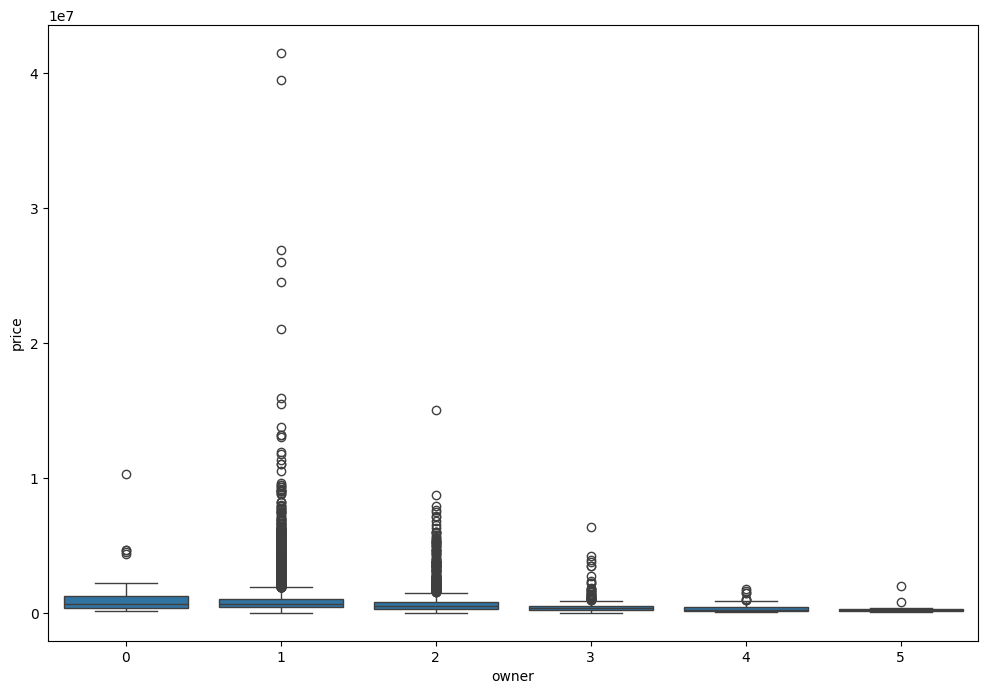

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

var = 'owner'
data = pd.concat([detail_frame['price'], detail_frame[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="price", data=data)


In [91]:
fig = px.histogram(detail_frame, x="km", y="price", color="modelYear",
                   marginal="box", # or violin, rug
                   hover_data=detail_frame.columns)
fig.show()

In [92]:
KMPriceFrame = detail_frame.groupby(['oem','owner']).price.agg(['mean']).sort_values(by = 'mean',ascending = False).reset_index()
#KMPriceFrame['mean'] = KMPriceFrame["mean"].apply(lambda x : x/100000)

KMPriceFrame.rename(columns = {'mean':'Avg Price'}, inplace = True)
fig = px.bar(KMPriceFrame, x="oem", y="Avg Price",color = 'owner', orientation='v')
fig.update_layout( xaxis_tickangle=-45)
fig.show()